In [1]:
import pandas as pd
import os.path
from glob import glob

In [2]:
by_city_output_folder = 'data/bycity'

In [3]:
glob(os.path.join(by_city_output_folder, '874*.csv'))

['data/bycity/87405.csv',
 'data/bycity/87412.csv',
 'data/bycity/87416.csv',
 'data/bycity/87418.csv',
 'data/bycity/87436.csv',
 'data/bycity/87444.csv',
 'data/bycity/87448.csv',
 'data/bycity/87453.csv',
 'data/bycity/87467.csv',
 'data/bycity/87470.csv',
 'data/bycity/87480.csv',
 'data/bycity/87497.csv']

In [4]:
df = pd.concat([pd.read_csv(x) for x in glob(os.path.join(by_city_output_folder, '*.csv'))]).reset_index(drop=True)

In [5]:
df

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date
0,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-4.6,0.2,-5.9,0.0,2021-01-01
1,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-0.8,1.5,-6.6,3.9,2021-01-02
2,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.6,4.4,0.4,0.0,2021-01-03
3,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.9,3.3,0.9,0.2,2021-01-04
4,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-1.7,-0.3,-4.9,0.0,2021-01-05
...,...,...,...,...,...,...,...,...,...,...
2006572,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.6,31.1,22.8,0.0,2021-12-24
2006573,98851,ヘネラルサントス,フィリピン,6.05,125.10,27.7,32.4,22.6,12.0,2021-12-25
2006574,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.8,31.7,23.0,0.0,2021-12-26
2006575,98851,ヘネラルサントス,フィリピン,6.05,125.10,24.9,27.9,21.4,0.0,2021-12-28


In [6]:
df['month'] = df['date'].apply(lambda x: int(x[5:7]))

In [7]:
df

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date,month
0,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-4.6,0.2,-5.9,0.0,2021-01-01,1
1,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-0.8,1.5,-6.6,3.9,2021-01-02,1
2,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.6,4.4,0.4,0.0,2021-01-03,1
3,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,1.9,3.3,0.9,0.2,2021-01-04,1
4,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-1.7,-0.3,-4.9,0.0,2021-01-05,1
...,...,...,...,...,...,...,...,...,...,...,...
2006572,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.6,31.1,22.8,0.0,2021-12-24,12
2006573,98851,ヘネラルサントス,フィリピン,6.05,125.10,27.7,32.4,22.6,12.0,2021-12-25,12
2006574,98851,ヘネラルサントス,フィリピン,6.05,125.10,26.8,31.7,23.0,0.0,2021-12-26,12
2006575,98851,ヘネラルサントス,フィリピン,6.05,125.10,24.9,27.9,21.4,0.0,2021-12-28,12


In [8]:
def is_first_char_1byte(s):
    if not s:  # 文字列が空の場合
        return None
    # 1文字目を取得し、その文字のバイト長を計算
    return len(s[0].encode('utf-8')) == 1

In [9]:
set(df[df['country_name'].str[:1].apply(is_first_char_1byte)]['country_name'])

{'DETACHED ISLANDS',
 'ISLANDS',
 'ISLANDS（北半球太平洋域）',
 'OCEAN ISLANDS',
 'STATIONS OPERATED BY ARGENTINA',
 'STATIONS OPERATED BY AUSTRALIA',
 'STATIONS OPERATED BY CHILE',
 'STATIONS OPERATED BY CHINA',
 'STATIONS OPERATED BY INDIA',
 'STATIONS OPERATED BY NORWAY',
 'STATIONS OPERATED BY SPAIN',
 'STATIONS OPERATED BY THE RUSSIAN FEDERATION',
 'STATIONS OPERATED BY THE U.S.A.'}

In [10]:
df = df[~df['country_name'].str[:1].apply(is_first_char_1byte)].reset_index(drop=True)

In [11]:
df_mean = df.groupby(['country_name', 'month']).mean()[['mean', 'max', 'min']]
df_std = df.groupby(['country_name', 'month']).std()[['mean', 'max', 'min']]
df_std.columns = ['mean_sd', 'max_sd', 'min_sd']
df_mean_sd = pd.merge(df_mean, df_std, left_index=True, right_index=True)

In [12]:
from itertools import chain
df_mean_sd = df_mean_sd[list(chain(*zip(df_mean.columns, df_std.columns)))]

In [13]:
df_mean_sd

mean   mean_sd        max    max_sd        min  \
country_name month                                                        
アイスランド       1      -2.822464  4.859636  -0.389855  4.696610  -5.626812   
             2      -0.420588  4.016745   1.866176  3.625715  -2.847794   
             3       0.284722  4.272997   2.765625  4.204204  -2.290278   
             4       1.243919  4.944401   4.254054  5.258959  -2.170270   
             5       3.176190  3.994111   6.436054  4.603824  -0.521769   
...                       ...       ...        ...       ...        ...   
赤道ギニア        8      26.230435  0.561196  29.278261  0.882124  23.330435   
             9      26.322727  0.418537  29.422727  0.761535  23.772727   
             10     26.591667  0.703832  30.016667  0.643617  23.833333   
             11     26.860000  0.708891  30.300000  0.870572  23.780000   
             12     27.739286  0.772844  31.553571  0.892554  24.421429   

                      min_sd  
country_name month            
アイスランド       1      5.828029  
             2      4.779741  
             3      4.898870  
             4      5.198894  
             5      4.124675  
...                      ...  
赤道ギニア        8      0.955099  
             9      0.719247  
             10     0.798104  
             11     1.002418  
             12     1.059475  

[2136 rows x 6 columns]

In [14]:
df_mean_sd.to_csv('data/month_mean.csv', index=True)

# Visualize

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [16]:
df_mean = df_mean[['max', 'mean', 'min']]

<AxesSubplot:ylabel='country_name-month'>

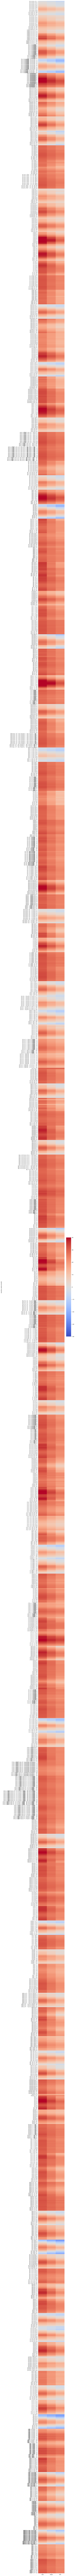

In [17]:
plt.figure(figsize=(5, 400)) 
sns.heatmap(df_mean, cmap='coolwarm', vmin=-40, vmax=40)